# Veri Aktarımı ve Düzenlenmesi


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/machine_learning/dogrusal_regresyon_veriseti.csv", sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


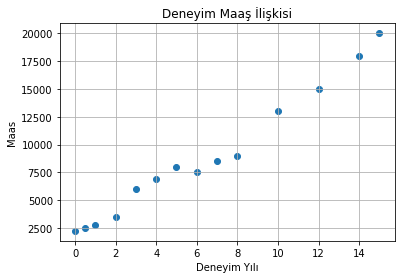

In [3]:
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim Yılı")
plt.ylabel("Maas")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

# Doğrusal Regresyon Modeli

In [4]:
#Doğrusal Regresyon Modeli:
linear_reg= LinearRegression()

# data içerisinde bulunan maas ve deneyim Sutunları numpy array'e çevir
x=df.deneyim.values.reshape(-1,1)
y=df.maas.values.reshape(-1,1)

# dogrusal regresyon eğitimi 
linear_reg.fit(x,y)

LinearRegression()

In [5]:
# y eksenini kestiği nokta intercept bulunması (alternatif yöntem)
y_ekseni_kesisim=np.array([0]).reshape(-1,1)
b0=linear_reg.predict(y_ekseni_kesisim)
print("b0:",b0)

#y eksenini kestiği nokta(intercept)
b0_= linear_reg.intercept_
print("b0_ :",b0_)

# eğim (slope) bulunması
b1=linear_reg.coef_
print("b1:",b1)


b0: [[1663.89519747]]
b0_ : [1663.89519747]
b1: [[1138.34819698]]


In [6]:
# maas= 1163 + 1138*deneyim
# y eksenini kestiği nokta ve eğime göre doğrusal model oluşturulur

deneyim=11 #11 yıllık deneyim

# 11 yıllık deneyime sahip birinin maaşı tahmin edilir.
maas_yeni= 1663 + 1138*deneyim
print(maas_yeni)

# 11  yıllık deneyime sahip birinin maaşı mredict meto ile tahmin edilir( alternatif  yöntem)
sonuc= linear_reg.predict(np.array([deneyim]).reshape(-1,1))
print("11 yıllık deneyime sahip birinin maaşı: {} TL".format(sonuc[0]))


14181
11 yıllık deneyime sahip birinin maaşı: [14185.72536421] TL


## Basit Doğrusal Regresyon Modeli ile Test/Tahmin/Görselleştirme
- Basit Doğrusal regresyon modelimizi kullanarak tahminler yapacağız ve sonuçları göreceğiz.

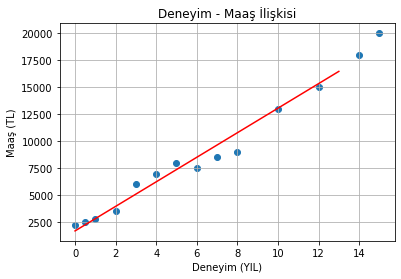

In [7]:
# Doğrusalk Regresyon Modeli ile Test/Tahmin/Görselleştirme
array= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13]).reshape(-1,1)

plt.figure()
plt.scatter(x,y)

# 0-15 yılları arasında deneyime sahip insanların maaşı tahmin edilir

y_head= linear_reg.predict(array) # y_head = maas


plt.plot(array, y_head,color="red") # (deneyim,maas)
plt.xlabel("Deneyim (YIL)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim - Maaş İlişkisi")
plt.grid(True)
plt.show()

# Çoklu Doğrusal Regresyon Modeli

In [8]:
# kütüphaneleri içeri aktar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn kütüphanesinden Regresyonu içeri aktar
from sklearn.linear_model import LinearRegression


In [9]:
# Çoklu dorusal regresyon yapacağımız veriyi içeri aktaralım:

df= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/machine_learning/coklu_dogrusal_regresyon_veriseti.csv", sep=";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [10]:
# deneyim ve yas değerlerine ulaşalım ve regresyon yapabilmek için istenilen formata dönüştürelim:

x= df.iloc[:, [0,2]].values
print(x)

[[ 0.5 22. ]
 [ 0.  21. ]
 [ 1.  23. ]
 [ 5.  25. ]
 [ 8.  28. ]
 [ 4.  23. ]
 [15.  35. ]
 [ 7.  29. ]
 [ 3.  22. ]
 [ 2.  23. ]
 [12.  32. ]
 [10.  30. ]
 [14.  34. ]
 [ 6.  27. ]]


In [11]:
# y değerlerine ulasalım
y= df.maas.values.reshape(-1,1)
print(y)

[[ 2500]
 [ 2250]
 [ 2750]
 [ 8000]
 [ 9000]
 [ 6900]
 [20000]
 [ 8500]
 [ 6000]
 [ 3500]
 [15000]
 [13000]
 [18000]
 [ 7500]]


In [12]:
# Çoklu Doğrusal Regresyon Modeli Eğitimi 
coklu_dogrusal_regresyon = LinearRegression()

# doğrusal regresyon eğitimi :
coklu_dogrusal_regresyon.fit(x,y)


LinearRegression()

In [13]:
# test 1:
test_verisi1 = np.array([[10,35]]) # deneyim =10 yas= 35 
test_sonucu1 = coklu_dogrusal_regresyon.predict(test_verisi1)
print("10 Yıllık deneyim ve 35 yaş sonucu çıkan maaş: {} ".format(test_sonucu1[0]))

10 Yıllık deneyim ve 35 yaş sonucu çıkan maaş: [11046.35815877] 


In [14]:
# test 2 : 
test_verisi2 = np.array([[5,22]])
test_sonucu2 = coklu_dogrusal_regresyon.predict(test_verisi2)
print("5 Yıllık deneyim ve 22 yaş sonucu çıkan maaş: {} ".format(test_sonucu2[0]))

5 Yıllık deneyim ve 22 yaş sonucu çıkan maaş: [8836.24297738] 


# Polinomsal Regresyon 

-  Değişkenler arasındaki ilişkisi doğrusal olmadığı durumlarda başvurulan analiz yöntemi



In [16]:
# kütüphanaleri içeri aktaralım
import pandas as pd 
import matplotlib.pyplot as plt

# Sklearn kütüphanesini içeri aktar :
from sklearn.linear_model import LinearRegression # doğrusal
from sklearn.preprocessing import PolynomialFeatures # polinomsal

In [17]:
# verimizi içeri aktaralım 
df= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/machine_learning/polinomsal_regresyon_veriseti.csv",sep=";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [18]:
y=df.araba_max_hiz.values.reshape(-1,1)
x=df.araba_fiyat.values.reshape(-1,1)

<function matplotlib.pyplot.show>

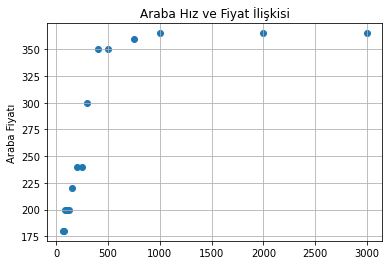

In [19]:
#veriyi görselleştir 
plt.scatter(x,y)
plt.ylabel("Araba Maksimum Hızı")
plt.ylabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show

- öncelikli olarak bu veriye doğrusal regresyon modelini deneyip sonra polinomsal regresyonla karşılaştıracağız.

In [20]:
# Doğrusal regresyon modeli eğitmi 
lr= LinearRegression()
# doğrusal regresyon eğitimi 
lr.fit(x,y)

LinearRegression()

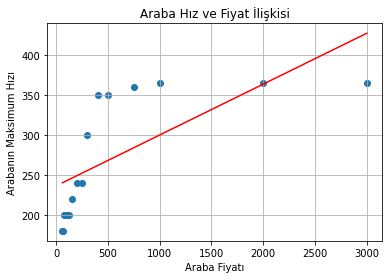

In [24]:
y_tahmin=lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color= "red")
plt.ylabel("Arabanın Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [25]:
# plinomsal Regresyon

polinom_regresyon= PolynomialFeatures(degree = 4)

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [26]:
# polinomsal regresyonu eğitebilmek için polinomsal özellikler ile 
lr2= LinearRegression()
lr2.fit(x_polinom,y)

LinearRegression()

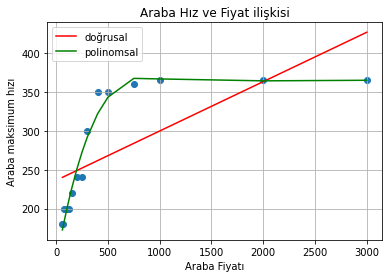

In [28]:
# tahmin 

y_tahmin2 = lr2.predict(x_polinom)
plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red",label="doğrusal")
plt.legend()
plt.plot(x,y_tahmin2,color="green",label="polinomsal")
plt.legend()
plt.ylabel("Araba maksimum hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat ilişkisi")
plt.grid(True)
plt.show()

## Regresyon Modellerinin Değerlendirilmesi
- R Kare (R^2), regresyonda en yaygın olarak bilinen değerlendirme ölçütlerinden biridir. 
- R^2 nin en yaygın yorumı, regresyon modelinin gözlemlenen verilere ne kadar iyi uyduğudur. Genellikle, daha yüksek bir R kare, model için daha iyi bir uyumu gösterir.
 

## R^2 ile regresyon modellerinin değerlendirilmesi 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sklearn kütüphanesini iç.eri aktar 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [31]:
# veriyi içeri aktar 

df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/machine_learning/dogrusal_regresyon_veriseti.csv",sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


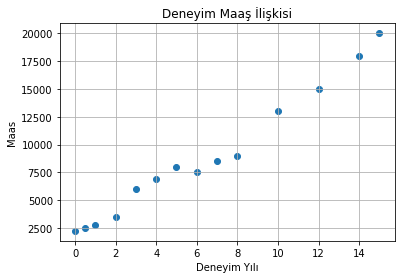

In [32]:
# veriyi görselleştir 
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim Yılı")
plt.ylabel("Maas")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [33]:
# data içerisinde bulunan maaş ve deneyim sütunlarını numpy array'e çevir 

x=df.deneyim.values.reshape(-1,1)
y= df.maas.values.reshape(-1,1)


In [34]:
#Doğrusal Regresyon Modeli Eğitimi 

# Doğrusal regresyon Modeli 
linear_reg= LinearRegression()

#doğrusal regresyon eğitimi 
linear_reg.fit(x,y)

LinearRegression()

In [36]:
# Polinomsal  Regresyon Modeli Eğitimi ,

polinom_regresyon= PolynomialFeatures(degree = 2)

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom

# polinomsal regresyon eğitebilmek için polinomsal özellikler ile 
poly_reg =LinearRegression()
poly_reg.fit(x_polinom, y)


LinearRegression()

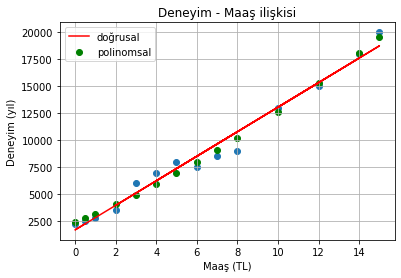

In [39]:
# test 

y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly= poly_reg.predict(x_polinom)


plt.scatter(df.deneyim,df.maas)
plt.plot(x,y_tahmin_linear,color="red",label="doğrusal")
plt.legend()
plt.scatter(x,y_tahmin_poly,color="green",label="polinomsal")
plt.legend()
plt.ylabel("Deneyim (yıl)")
plt.xlabel("Maaş (TL)")
plt.title("Deneyim - Maaş ilişkisi")
plt.grid(True)
plt.show()

In [42]:
print("Doğrusal Regresyon R kare: {}",r2_score(y,y_tahmin_linear))
print("Polinomsal Regresyon R kare: {}", r2_score(y,y_tahmin_poly))

Doğrusal Regresyon R kare: {} 0.9775283164949903
Polinomsal Regresyon R kare: {} 0.9854449464578782
